In [1]:
from functions.data_handler import DataHandler

## Overview of callable methods within DataHandler 
### DataHandler is a class with 4 methods:
<ol>
<li> <b> download_file</b> </li>
 <em> Downloads the file if it doesn't already exists </em> <br></br>
<li> <b> zip_to_dataframe</b> </li>
 <em> Creates a Pandas Dataframe from zip file within your downloads folder </em> <br></br>
<li> <b> plot_correlation_matrix</b> </li>
 <em> Correllation matrix for month, humidity, weather situation, temperature, windspeed, and total number of bike rentals </em> <br></br>
<li> <b> plot_weekly_data</b> </li>
 <em> Shows the rentals of a given week in a graph  </em> <br></br>
</ol>
<em> Check below for a full print of the documentation for the class DataHandler</em>

In [2]:
help(DataHandler)

Help on class DataHandler in module functions.data_handler:

class DataHandler(builtins.object)
 |  DataHandler(dataframe: dataenforce.Dataset = Empty DataFrame
 |  Columns: []
 |  Index: [])
 |  
 |  A class to hold data and perform basic exploratory data operations.
 |  Attributes:
 |  -----------
 |  dataframe: Dataset
 |    A DataFrame containing the downloaded data
 |  Methods:
 |  -----------
 |  download_file(file_link: str, output_file: str):
 |    Downloads the specified output file contained in
 |    file_link into the "downloads" directory.
 |  zip_to_dataframe(output_file: str, csv_file: str):
 |    Creates a pandas dataframe from a csv file inside
 |    a specific zip archive (within your /downloads directory).
 |  plot_correlation_matrix:
 |    Plots a correlation matrix for month, humidity, weather situation,
 |      temperature, windspeed, and total number of bike rentals
 |  plot_weekly_data(week: int):
 |    Plots the data of a chosen week
 |  
 |  Methods defined her

In [3]:
# We are now storing the DataHandler in a variable called "data_instance" for later use.
data_instance = DataHandler()

To maintain an overview we call the link, name of output file and the csv_file we intend to use.

In [4]:

file_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
output_file = "data.zip"
csv_file = "hour.csv"

### 1. Method:
We call <em> download_file </em> with above named parameters to download the desired file via a download link. For this step to work it is required to have a downloads folder within the git folder GROUP_J

In [5]:
data_instance.download_file(file_link, output_file)

File already exists!


### 2. Method:
With the zip file in the download folder we unzip the file and store it in a Pandas Dataframe with the naming convention "hour.csv" from ealier cell.

In [6]:
data_instance.zip_to_dataframe(output_file, csv_file)

In [7]:
data_instance.dataframe

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


### 3. Method:
In the third method we plot a correlation matrix for month, humidity, weather situation, temperature, windspeed, and total number of bike rentals in order to develop a better understanding of the connection between variables in the dataset

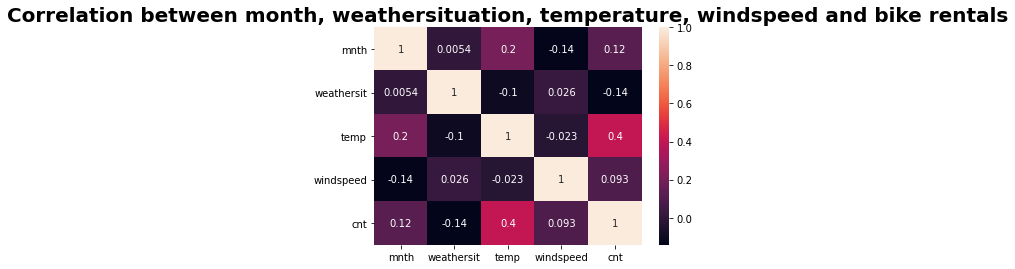

In [8]:
data_instance.plot_correlation_matrix()

### Empirical Findings

- In an initial we attempt to identify factors by which we can predict the bike rentals for a given week we explored the dataset by plotting the correlation matrix you can see above
- What one can overall say is that except for the perfect correlations on the diagonal, 0.4 is the highest correlation coefficient we could find. It is the correlation between the number of rentals and the temperature, which makes sense because people generally ride bikes in sunny weather. The second highest correlation was found to be between the number of rentals and month of 0.12. This finding also makes sense taking into account that temperature and month correlate with a coefficient of 0.2. Generally speaking, one can infer that in summer the temperature is higher and hence the number of bike rentals is higher
- All other factors we investigated did not show a noteworthy correlation; neither with the number of bike rentals nor among each other
___
- As mentioned in the "Next Step" section at the bottom of this notebook, we were confused by some very low correlations. For example, the one between temperature and months, which should be higher due to common sense and all-weather seasons. For clarification reasons, a data dictionary should be created.

### 4. Method:
By providing which week we would like to see, we can easily see the number of bike rentals every week within and including 0-102. The week is is broken down in hours. 

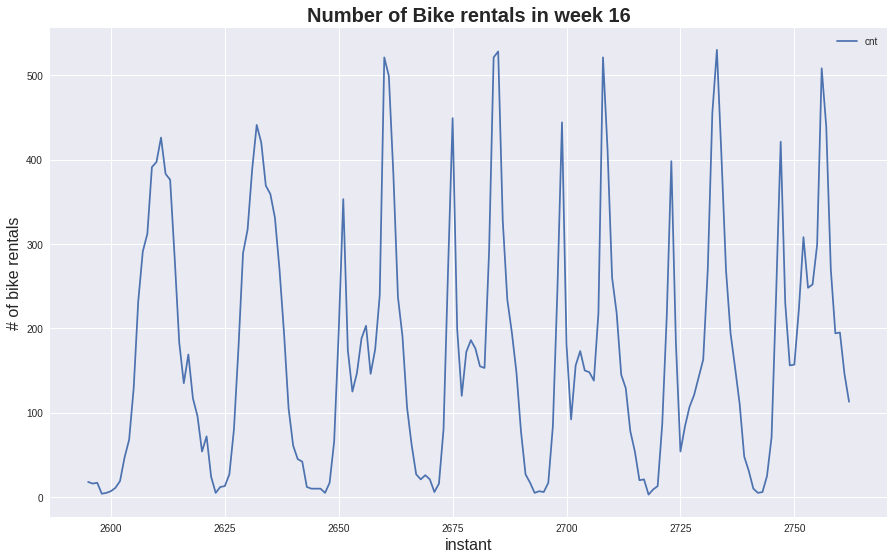

In [9]:
data_instance.plot_weekly_data(16)

It is however worth noting that negative inputs for week, floats or inputs larger than 102 are not accepted and instead provided with an ValueError as below.

In [10]:
data_instance.plot_weekly_data(300)

ValueError: Specified week outside of allowed range.
                             Week must be integer between 0 and 102.

### Empirical findings
- The plot above shows the number of rentals for a given week in the range of 0 to 102, inclusive. In the given case we printed the number of bike rentals on the y axis and the number of rental transactions on the x axis for week 16.
- What we can see is that the lowest number of bike rentals is around 1-10 and the five rental instants with the highest number of bikes rended are ~530 respectively.
___ 
- This way of presenting the data shows a high fluctuation in the number of bikes rented per rental and hence biases measures such as the median or the average.
- As further discussed in the "Next Steps" section below, we thus want to plot an average for the entire period of 102 weeks as well as for sections based on siginificant factors such as temperature and month.

### Next steps
- With our ultimate goal to promote cycling awareness and to contribute to the green transition, we need more information on the current bicycle usage to better scope the status quo situation.
- Hence we suggest the creation of a data dictionary to develop a profound understanding of all variables. Especially the values in columns "temp", "atemp", "hum", "windspeed" as well as the difference in the counts in columns "casual"& "registered" caught our attention and need further clarification. An example of a confusing data entries would be that temperature scores of i.e. 0.24 are not intuitive to interprete.
- After this data cleaning and the creation of a dictionary, our next step could then be to create a new correlation matrix to obtain interpretable data.
___
- Regarding the weekplot we need to furhter specify the investigated characteristics. The current visualization invites the intriging thought that there is a constant booking demand for a given week. However, the number of rentals might be unevenly distributed over the weekdays. During data investigation, we found out that instances are hourly and daily accumulated bicycle rentals. However, an instance is not mentioned in the dataset if there was no rental (minimum rental = 1). This point should be further analysed with the purpose of identifying patterns of the status quo usage.
- Further, it would be interesting to better understand why the number of bikes rended fluctuates so much and if it might be useful to distinguish private rentings (0-10 bikes) from commercial bookings
- Lastly, we will further engage in developing overviews to identify seasonal fluctuations throughout the year.

In [11]:
data_instance.plot_monthly_average()

AttributeError: 'Rectangle' object has no property 'cmap'